In [142]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
df = pd.read_csv('foodData2.csv')

In [143]:
df.head()

,UserID,Gender,Age Group,Top 6 most preferred dishes,laksa,Chili Crab,Char Kway Teow,hainanese chicken rice,Sliced Fish Soup,Fish and Chips,...,Roti Prata,Black Pepper Crab,Roti John,Cereal Prawn,Beef Kway Teow,Katong laksa,Sambal Stingray,Crab Bee Hoon Soup,Satay,sum
0,1,Female,15 - 24,"Sliced Fish Soup, Japanese Bento,Curry laksa, ...",0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,6
1,2,Male,15 - 24,"Hainanese Chicken Rice, Fish and Chips, Japane...",0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,6
2,3,Male,15 - 24,"Char Kway Teow, Hainanese Chicken Rice, Fish a...",0,0,1,1,0,1,...,1,0,1,0,0,0,0,0,0,6
3,4,Female,15 - 24,"Laksa , Hainanese Chicken Rice, Japanese Bento...",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,5,Female,15 - 24,"Fish and Chips, Japanese Bento, Duck Rice, Hok...",0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,6


In [144]:
df.columns

Index(['UserID', 'Gender', 'Age Group', ' Top 6 most preferred dishes',
       'laksa', 'Chili Crab', 'Char Kway Teow', 'hainanese chicken rice',
       'Sliced Fish Soup', 'Fish and Chips', 'Chinese Economy Rice',
       'Japanese Bento', 'Curry laksa', 'Yu Sheng', 'Duck Rice',
       'Fish Head Curry', 'Bak Kut Teh', 'Hokkien Mee', 'Kway Chap',
       'Roti Prata', 'Black Pepper Crab', 'Roti John', 'Cereal Prawn',
       'Beef Kway Teow', 'Katong laksa', 'Sambal Stingray',
       'Crab Bee Hoon Soup', 'Satay', 'sum'],
      dtype='object')

In [145]:
df.shape

(359, 29)

In [146]:
df.describe()

,UserID,laksa,Chili Crab,Char Kway Teow,hainanese chicken rice,Sliced Fish Soup,Fish and Chips,Chinese Economy Rice,Japanese Bento,Curry laksa,...,Roti Prata,Black Pepper Crab,Roti John,Cereal Prawn,Beef Kway Teow,Katong laksa,Sambal Stingray,Crab Bee Hoon Soup,Satay,sum
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,...,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.0
mean,180.000000,0.339833,0.284123,0.342618,0.523677,0.403900,0.323120,0.284123,0.353760,0.153203,...,0.284123,0.136490,0.077994,0.214485,0.077994,0.164345,0.239554,0.233983,0.214485,6.0
std,103.778611,0.474313,0.451625,0.475247,0.500136,0.491363,0.468321,0.451625,0.478803,0.360686,...,0.451625,0.343788,0.268537,0.411037,0.268537,0.371106,0.427407,0.423953,0.411037,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0
25%,90.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0
50%,180.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0
75%,269.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0
max,359.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.0


In [147]:
df["Age Group"].unique()

array(['15 - 24', '14 and below', '25 - 54', '55 - 64', '65 and above'],
      dtype=object)

In [148]:
df.isnull().sum()

UserID                          0
Gender                          0
Age Group                       0
 Top 6 most preferred dishes    0
laksa                           0
Chili Crab                      0
Char Kway Teow                  0
hainanese chicken rice          0
Sliced Fish Soup                0
Fish and Chips                  0
Chinese Economy Rice            0
Japanese Bento                  0
Curry laksa                     0
Yu Sheng                        0
Duck Rice                       0
Fish Head Curry                 0
Bak Kut Teh                     0
Hokkien Mee                     0
Kway Chap                       0
Roti Prata                      0
Black Pepper Crab               0
Roti John                       0
Cereal Prawn                    0
Beef Kway Teow                  0
Katong laksa                    0
Sambal Stingray                 0
Crab Bee Hoon Soup              0
Satay                           0
sum                             0
dtype: int64

Since no data is null , No data filling is required for our dataset

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   UserID                        359 non-null    int64 
 1   Gender                        359 non-null    object
 2   Age Group                     359 non-null    object
 3    Top 6 most preferred dishes  359 non-null    object
 4   laksa                         359 non-null    int64 
 5   Chili Crab                    359 non-null    int64 
 6   Char Kway Teow                359 non-null    int64 
 7   hainanese chicken rice        359 non-null    int64 
 8   Sliced Fish Soup              359 non-null    int64 
 9   Fish and Chips                359 non-null    int64 
 10  Chinese Economy Rice          359 non-null    int64 
 11  Japanese Bento                359 non-null    int64 
 12  Curry laksa                   359 non-null    int64 
 13  Yu Sheng            

In [150]:
br = df.replace('Female',0)
br = br.replace('Male',1)


In [151]:
br.columns = br.columns.str.replace(' ','_')

In [152]:
br.head()

,UserID,Gender,Age_Group,_Top_6_most_preferred_dishes,laksa,Chili_Crab,Char_Kway_Teow,hainanese_chicken_rice,Sliced_Fish_Soup,Fish_and_Chips,...,Roti_Prata,Black_Pepper_Crab,Roti_John,Cereal_Prawn,Beef_Kway_Teow,Katong_laksa,Sambal_Stingray,Crab_Bee_Hoon_Soup,Satay,sum
0,1,0,15 - 24,"Sliced Fish Soup, Japanese Bento,Curry laksa, ...",0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,6
1,2,1,15 - 24,"Hainanese Chicken Rice, Fish and Chips, Japane...",0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,6
2,3,1,15 - 24,"Char Kway Teow, Hainanese Chicken Rice, Fish a...",0,0,1,1,0,1,...,1,0,1,0,0,0,0,0,0,6
3,4,0,15 - 24,"Laksa , Hainanese Chicken Rice, Japanese Bento...",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,5,0,15 - 24,"Fish and Chips, Japanese Bento, Duck Rice, Hok...",0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,6


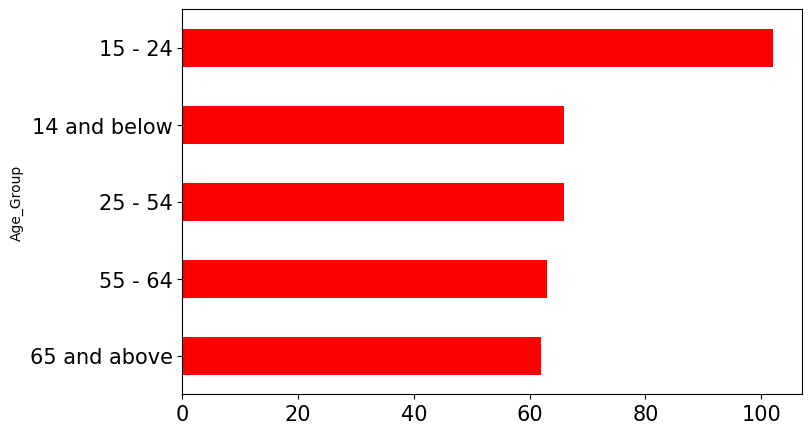

In [153]:
br['Age_Group'].value_counts().plot(kind='barh', figsize=[8,5], fontsize=15, color = "Red").invert_yaxis()

In [154]:
df.head()

,UserID,Gender,Age Group,Top 6 most preferred dishes,laksa,Chili Crab,Char Kway Teow,hainanese chicken rice,Sliced Fish Soup,Fish and Chips,...,Roti Prata,Black Pepper Crab,Roti John,Cereal Prawn,Beef Kway Teow,Katong laksa,Sambal Stingray,Crab Bee Hoon Soup,Satay,sum
0,1,Female,15 - 24,"Sliced Fish Soup, Japanese Bento,Curry laksa, ...",0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,6
1,2,Male,15 - 24,"Hainanese Chicken Rice, Fish and Chips, Japane...",0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,6
2,3,Male,15 - 24,"Char Kway Teow, Hainanese Chicken Rice, Fish a...",0,0,1,1,0,1,...,1,0,1,0,0,0,0,0,0,6
3,4,Female,15 - 24,"Laksa , Hainanese Chicken Rice, Japanese Bento...",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,5,Female,15 - 24,"Fish and Chips, Japanese Bento, Duck Rice, Hok...",0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,6


In [155]:
df["res"]=df["Age Group"]+" "+df["Gender"]+' '+df[" Top 6 most preferred dishes"]

In [156]:
df["res"]

0      15 - 24 Female Sliced Fish Soup, Japanese Bent...
1      15 - 24 Male Hainanese Chicken Rice, Fish and ...
2      15 - 24 Male Char Kway Teow, Hainanese Chicken...
3      15 - 24 Female Laksa , Hainanese Chicken Rice,...
4      15 - 24 Female Fish and Chips, Japanese Bento,...
                             ...                        
354    25 - 54 Female Laksa , Char Kway Teow, Hokkien...
355    25 - 54 Male Chili Crab, Duck Rice, Fish Head ...
356    15 - 24 Male Laksa , Hainanese Chicken Rice, F...
357    55 - 64 Female Laksa , Japanese Bento, Fish He...
358    14 and below Male Laksa , Hainanese Chicken Ri...
Name: res, Length: 359, dtype: object

In [157]:
#print(tfidf_matrix_train )
# print(tfidf_matrix_test)

In [158]:
# print(tfidf_matrix_train )

In [172]:
age = int(input("Enter Your Age"))
age

56

In [160]:
if (age<=14):
    ageggroup='14 and below'
elif ((age>=15) & (age<=24)):
    ageggroup='15 - 24'
elif (age>=25 & age<=54):
    ageggroup='25 - 54'
elif (age>=55 & age<=64):
    ageggroup='55 - 64'
else:
    ageggroup='65 and above'

In [161]:
print(ageggroup)

25 - 54


In [10]:
while True :
    gender = input("please enter your gender")
    gender = gender.capitalize()
    if gender == "Male":
        gender = "1"
        break
    elif gender == "Female":
        gender = "0"
        break
    else :
        print("Enter Only Male or Female")
gender


'0'

In [170]:
# gender = input("please enter your gender")
# gender = gender.capitalize()
# gender

'Male'

In [2]:
while True :
    dish = input("Please Enter One Dish Name")
    if dish.isalpha():
        dish = dish.capitalize()
        break
    else :
        pass
dish


'Lol'

In [163]:
dish= input("please enter one dish")
dish = dish.capitalize()

'FIsh'

In [164]:
inp = ageggroup + ' ' + gender + ' '+ dish
inp

'25 - 54 Male FIsh'

In [165]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer 

TfidfVectorizer()

In [166]:

tfidf_matrix_train = tfidf_vectorizer.fit_transform(br['res'])

tfidf_matrix_test = tfidf_vectorizer.transform([inp])

a = cosine_similarity(tfidf_matrix_train,tfidf_matrix_test)

In [167]:
index=np.argmax(a)
index

304

In [168]:
print('following are recommended dishes')
df[" Top 6 most preferred dishes"][index]

following are recommended dishes


'Laksa , Chili Crab, Char Kway Teow, Hainanese Chicken Rice, Fish and Chips, Japanese Bento'